In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# here we are working on Tensorflow version 2.1.0 so we need to write tensorflow.keras.
#keras is in built function in Tensorflow.
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

train_location = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"
test_location = "/content/drive/MyDrive/Colab Notebooks/fake currency/test_dataset"
filepath = '/content/drive/MyDrive/Colab Notebooks/fake currency/Model/model1_densenet.keras'

#train_location = "/content/drive/MyDrive/Colab Notebooks/Parkinson Disease/dataset"
#test_location = "/content/drive/MyDrive/Colab Notebooks/Parkinson Disease/dataset"
#filepath = '/content/drive/MyDrive/Colab Notebooks/Parkinson Disease/Model/model1_DenseNet169.keras'

In [ ]:
preprocess_input = tensorflow.keras.applications.densenet.preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
img_size=224
batch_size=48
num_class=12

In [ ]:
# Complete Dataset images can be loaded using ImageDataGenerator function

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input  #  Use DenseNet preprocessing

# ✅ Training Data Generator with Augmentation + DenseNet Preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  #  DenseNet preprocessing
    rotation_range=30,  #  Random rotation (0-30 degrees)
    width_shift_range=0.2,  #  Horizontal shift
    height_shift_range=0.2,  #  Vertical shift
    shear_range=0.2,  #  Shear transformation
    zoom_range=0.2,  #  Zoom in/out
    horizontal_flip=True,  #  Flip images horizontally
    fill_mode='nearest'  #  Fill missing pixels
)

# ❌ Validation Data Generator (Only DenseNet Preprocessing, No Augmentation)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load Training Data (Augmented)
train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='categorical',  # ✅ Multi-class classification
    shuffle=True
)

# Load Validation Data (No Augmentation)
valid_batches = valid_datagen.flow_from_directory(
    validation_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # ❌ No need to shuffle validation data
)



Found 234 images belonging to 7 classes.
Found 234 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input

In [ ]:
DenseNet = DenseNet169(input_shape=[img_size,img_size] + [3], weights='imagenet', include_top=False)

In [ ]:
DenseNet.summary()

Model: "densenet169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 12,484,480 (47.62 MB)

 Non-trainable params: 158,400 (618.75 KB)

In [ ]:
for layer in DenseNet.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(DenseNet.output)
prediction = Dense(num_class, activation='softmax')(x)

In [ ]:
detection = Model(inputs=DenseNet.input, outputs=prediction)


In [ ]:
detection.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 13,213,639 (50.41 MB)

 Trainable params: 570,759 (2.18 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
optimum=Adam(learning_rate=0.005)
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
print(train_generator.class_indices)


{'1Hundrednote': 0, '2Hundrednote': 1, '5Hundred': 2, 'Fiftynote': 3, 'Tennote': 4, 'Twentynote': 5, 'fake5Hundred': 6}


In [ ]:
TRAIN_STEPS=train_generator.n//train_generator.batch_size
TRAIN_STEPS

4

In [ ]:
VALIDATION_STEPS=validation_generator.n//validation_generator.batch_size
VALIDATION_STEPS

4

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.5,
                              patience=2,
                              verbose=1,
                              mode='max',
                              min_lr=0.00001)

In [ ]:
callbacks_list = [checkpoint, reduce_lr]
#callbacks_list = [checkpoint]

In [ ]:
#history = detection.fit_generator(train_generator,
history = detection.fit(train_generator,
                              steps_per_epoch=TRAIN_STEPS,
                              #class_weight=class_weights,
                              validation_data=validation_generator,
                              validation_steps=VALIDATION_STEPS,
                              epochs=15,
                              verbose=1,
                              callbacks=callbacks_list
                             )

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1636 - loss: 442.5414 
Epoch 1: val_accuracy improved from -inf to 0.09896, saving model to /content/drive/MyDrive/Colab Notebooks/fake currency/Model/model1_densenet.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 143s 33s/step - accuracy: 0.1611 - loss: 518.5082 - val_accuracy: 0.0990 - val_loss: 1179.3651 - learning_rate: 0.0050
Epoch 2/15
1/4 ━━━━━━━━━━━━━━━━━━━━ 32s 11s/step - accuracy: 0.1429 - loss: 993.2768
Epoch 2: val_accuracy improved from 0.09896 to 0.35417, saving model to /content/drive/MyDrive/Colab Notebooks/fake currency/Model/model1_densenet.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 17s/step - accuracy: 0.1429 - loss: 993.2768 - val_accuracy: 0.3542 - val_loss: 710.9146 - learning_rate: 0.0050
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4047 - loss: 545.8729 
Epoch 3: val_accuracy did not improve from 0.35417
4/4 ━━━━━━━━━━━━━━━━━━━━ 140s 42s/step - accuracy: 0.4065 - loss: 546.3021 - val_accuracy: 0.2969 - val_l

In [ ]:
# get the metric names so I can use evaulate_generator
detection.metrics_names

['loss', 'compile_metrics']

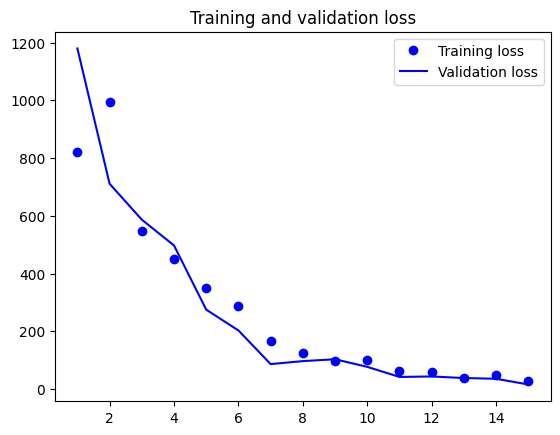

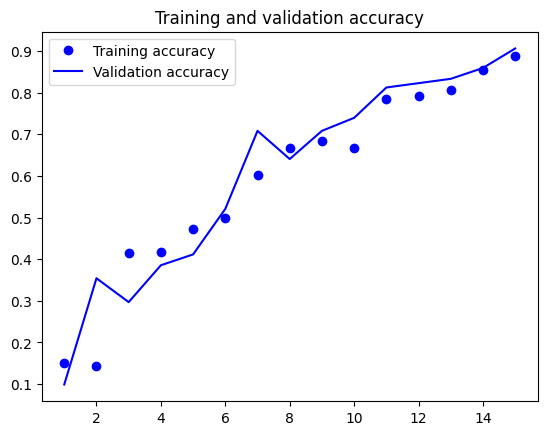

<Figure size 640x480 with 0 Axes>

In [ ]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

In [ ]:
epochs

range(1, 16)

In [ ]:
loss

[822.3751831054688,
 993.2767944335938,
 548.0186767578125,
 449.8362731933594,
 350.3834533691406,
 286.4266357421875,
 166.25950622558594,
 126.43119049072266,
 97.2234115600586,
 100.05545043945312,
 61.742454528808594,
 57.73359298706055,
 39.81624221801758,
 49.26095962524414,
 28.762054443359375]

In [ ]:
val_loss

[1179.3651123046875,
 710.91455078125,
 586.55029296875,
 497.3211975097656,
 275.0756530761719,
 203.0367431640625,
 86.517333984375,
 96.82901000976562,
 103.28231048583984,
 76.9798583984375,
 42.02864456176758,
 43.66536331176758,
 38.26713180541992,
 35.66164779663086,
 15.94287109375]

In [ ]:
acc

[0.1510416716337204,
 0.1428571492433548,
 0.4139784872531891,
 0.4166666567325592,
 0.47311827540397644,
 0.5,
 0.602150559425354,
 0.6666666865348816,
 0.6827957034111023,
 0.6666666865348816,
 0.7849462628364563,
 0.7916666865348816,
 0.8064516186714172,
 0.8541666865348816,
 0.8870967626571655]

In [ ]:
val_acc

[0.0989583358168602,
 0.3541666567325592,
 0.296875,
 0.3854166567325592,
 0.4114583432674408,
 0.5208333134651184,
 0.7083333134651184,
 0.640625,
 0.7083333134651184,
 0.7395833134651184,
 0.8125,
 0.8229166865348816,
 0.8333333134651184,
 0.859375,
 0.90625]